In [4]:
import pandas as pd
import matplotlib as plt

In [5]:
df_ruta = "./movies.csv"

In [6]:
df = pd.read_csv(df_ruta)

In [196]:
df.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911.0,53.0,5.8,265.0,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911.0,48.0,5.9,100.0,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912.0,100.0,5.1,620.0,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911.0,71.0,7.0,3500.0,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912.0,46.0,6.4,145.0,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama


¿Qué se va a analizar?

* Cantidad de generos

* Cantidad de directores

* Generos mas comunes

* Directores mas comunes

* Escritores mas comunes

* Clasificacion promedio de Escritores mejores calificados

* Clasificacion promedio de Directores mejores calificados

Visualizaciones

* Cantidad de peliculas estrenadas en cada año



## Informacion general

In [19]:
asd = df.columns
asd

Index(['Movie URL', 'Title', 'Poster', 'Release Year', 'Length in Min',
       'IMDB Rating', 'Rating Count', 'Plot', 'Directors', 'Writers', 'Stars',
       'Genres'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126691 entries, 0 to 126690
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Movie URL      126691 non-null  object 
 1   Title          126626 non-null  object 
 2   Poster         126384 non-null  object 
 3   Release Year   126618 non-null  float64
 4   Length in Min  124733 non-null  float64
 5   IMDB Rating    126624 non-null  float64
 6   Rating Count   126624 non-null  float64
 7   Plot           126626 non-null  object 
 8   Directors      125842 non-null  object 
 9   Writers        119634 non-null  object 
 10  Stars          125339 non-null  object 
 11  Genres         126515 non-null  object 
dtypes: float64(4), object(8)
memory usage: 11.6+ MB


### Cantidad de generos

In [10]:
df['Genres'].value_counts()

Genres
Drama                          16878
Comedy                          9608
Documentary                     5881
Comedy|Drama                    5430
Drama|Romance                   4750
                               ...  
Family|Fantasy|Comedy              1
Action|Thriller|Sci-Fi             1
Horror|Crime|Thriller              1
Drama|Action|Musical               1
Documentary|History|Musical        1
Name: count, Length: 1407, dtype: int64

### Cantidad de Directores

In [89]:
cantidades_directores = df['Directors'].value_counts()
cantidades_directores

Directors
Michael Curtiz|                85
William Beaudine|              74
Lloyd Bacon|                   73
Joseph Kane|                   70
Lesley Selander|               69
                               ..
György Kovásznai                1
Dominique Goult                 1
Stanley Donen|John Barry|       1
Taku Sugiyama|Osamu Tezuka|     1
Richard Zelniker|               1
Name: count, Length: 64160, dtype: int64

## Analisis

### Generos mas comunes

In [193]:
from collections import Counter

generos = df['Genres'].str.split(', ').explode()
contar_generos = Counter(generos)
top_generos = contar_generos.most_common(10)

df_top_generos = pd.DataFrame(top_generos, columns=['Genre', 'Count'])

df_top_generos

,Genre,Count
0,Drama,16878
1,Comedy,9608
2,Documentary,5881
3,Comedy|Drama,5430
4,Drama|Romance,4750
5,Comedy|Romance,3346
6,Comedy|Drama|Romance,3139
7,Horror,3122
8,Action|Crime|Drama,1926
9,Crime|Drama,1808


### Directores mas comunes

In [191]:
directores = df['Directors'].str.split(', ').explode()
contar_directores = Counter(directores)
top_directores = contar_directores.most_common(10)
df_top_directores = pd.DataFrame(top_directores, columns=['Director', 'Count'])

df_top_directores

,Director,Count
0,NaN,849
1,Michael Curtiz|,85
2,William Beaudine|,74
3,Lloyd Bacon|,73
4,Joseph Kane|,70
5,John Ford|,69
6,Lesley Selander|,69
7,Jesús Franco|,68
8,Richard Thorpe|,63
9,Raoul Walsh|,62


### Escritores mas comunes

In [190]:
escritores = df['Writers'].str.split(', ').explode()
contar_escritores = Counter(escritores)
top_escritores = contar_escritores.most_common(10)
df_top_escritores = pd.DataFrame(top_escritores, columns=['Writer', 'Count'])

df_top_escritores

,Writer,Count
0,NaN,7057
1,Jing Wong|,106
2,Kuang Ni|,55
3,Erdogan Tünas|,52
4,Safa Önal|,46
5,Woody Allen|,43
6,Giannis Dalianidis|,36
7,Ingmar Bergman|,32
8,Carlo Vanzina|Enrico Vanzina|,31
9,Ranjith|,30


### Escritores mejor calificados

In [188]:
calificaciones_escritores = df.groupby('Writers')['IMDB Rating'].mean().sort_values(ascending=False)
df_calificaciones_escritores = pd.DataFrame(calificaciones_escritores)
top_escritores_calificados = df_calificaciones_escritores.head(10)
top_escritores_calificados

,IMDB Rating
Writers,
Janet J|,9.9
Bosser|,9.8
Mahesh B Patil|,9.8
Roshin A Rahman|,9.8
Sanketh Ambali|Pradeep GM|Nagesh Kundapura|,9.7
Shashikanth Gatti|Bhat Pavan|,9.7
Siby Padiyara|,9.7
Rami Kodeih|,9.6
Kumbalathu Padmakumar|,9.6


### Directores mejores calificados

In [189]:
calificaciones_directores = df.groupby('Directors')['IMDB Rating'].mean().sort_values(ascending=False)
df_calificaciones_directores = pd.DataFrame(calificaciones_directores)
top_directores_calificados = df_calificaciones_directores.head(10)
top_directores_calificados

,IMDB Rating
Directors,
Janet J,9.9
Rahul R Krishna|,9.9
Bosser,9.8
Praveen Sutar,9.8
Roshin A Rahman,9.8
Patrick Chu|,9.7
Shashikanth Gatti|,9.7
Siby Padiyara,9.7
Neeraj Kumar|Deepika Narayan Bhardwaj,9.7


## Visualizaciones

### Cantidad de peliculas estrenadas por año

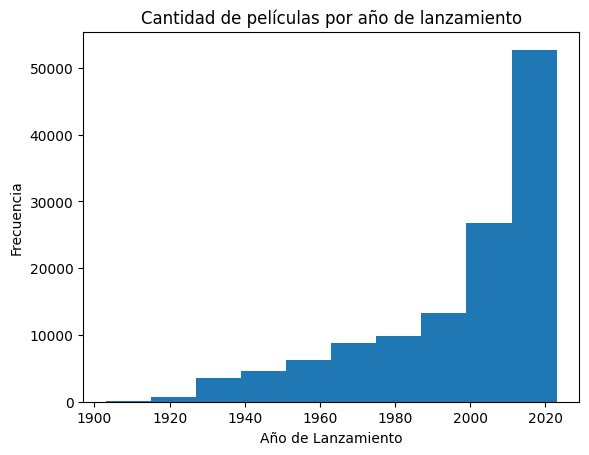

In [195]:
plt.hist(df["Release Year"])
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Frecuencia")
plt.title("Cantidad de películas por año de lanzamiento")
plt.show()

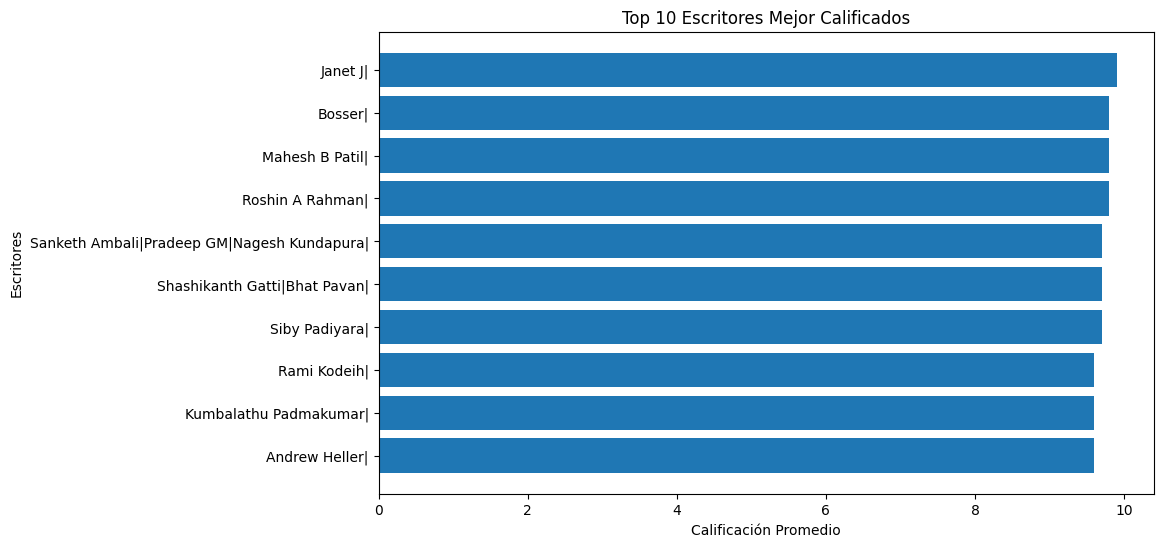

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_escritores_calificados.index, top_escritores_calificados['IMDB Rating'])
plt.xlabel('Calificación Promedio')
plt.ylabel('Escritores')
plt.title('Top 10 Escritores Mejor Calificados')
plt.gca().invert_yaxis()  # Invertir el eje y para que el escritor con la calificación más alta esté en la parte superior
plt.show()
